# Cognifyz Data Analysys LEVEL_2 (Shantanu Garain)

## Importing Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import folium
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dataset.csv')

# LEVEL_2 Task_1 (Restaurent Ratings)

## 1. Analyze the distribution of aggregate ratings and determine the most common rating range  

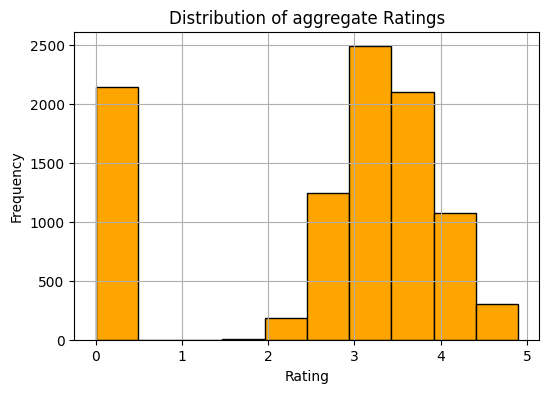

The most common rating range is: 0.0


In [3]:
def rating_distribution(dataset_path):
    plt.figure(figsize=(6,4))
    plt.hist(df['Aggregate rating'], bins = 10, edgecolor = 'black', color = 'orange')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.title('Distribution of aggregate Ratings')
    plt.grid(True)
    plt.show()
    
    most_common_range = df['Aggregate rating'].mode()[0]
    return most_common_range

dataset_path = 'Restaurents.csv'
most_common_rating_range = rating_distribution(dataset_path)

print(f"The most common rating range is: {most_common_rating_range}")

## 2.Calculate the average number of votes received by restaurants. 

In [4]:
avg_votes = df['Votes'].mean()
print(f"The average number of votes is {avg_votes} received by restaurents")

The average number of votes is 156.909747670401 received by restaurents


# LEVEL_2 Task_2 (Cuisine Combination)

## 1.  Identify the most common combinations of cuisines in the dataset.

In [5]:
common_combination = df['Cuisines'].str.split(',').explode()
count = common_combination.value_counts()
print(count)

Cuisines
North Indian      2992
 Chinese          1880
 Fast Food        1314
 North Indian      968
Chinese            855
                  ... 
 Ramen               1
Indonesian           1
 Bubble Tea          1
Kiwi                 1
 World Cuisine       1
Name: count, Length: 249, dtype: int64


## 2.  Determine if certain cuisine combinations tend to have higher ratings. 

In [6]:
rating = df.groupby('Cuisines')['Aggregate rating'].mean()
rating

Cuisines
Afghani                                      0.725
Afghani, Mughlai, Chinese                    0.000
Afghani, North Indian                        0.000
Afghani, North Indian, Pakistani, Arabian    0.000
African                                      4.700
                                             ...  
Western, Asian, Cafe                         4.200
Western, Fusion, Fast Food                   3.200
World Cuisine                                4.900
World Cuisine, Mexican, Italian              4.400
World Cuisine, Patisserie, Cafe              4.200
Name: Aggregate rating, Length: 1825, dtype: float64

In [7]:
# Finding the top ratings
top_rating = rating.sort_values(ascending=False)
top_rating

Cuisines
Italian, Deli                     4.9
Hawaiian, Seafood                 4.9
American, Sandwich, Tea           4.9
Continental, Indian               4.9
European, Asian, Indian           4.9
                                 ... 
Fast Food, Desserts, Beverages    0.0
Fast Food, Chinese, Burger        0.0
Cafe, French                      0.0
Seafood, Mughlai, North Indian    0.0
Fast Food, Mughlai, Armenian      0.0
Name: Aggregate rating, Length: 1825, dtype: float64

In [8]:
print(f"cuisine combinations tend to have higher ratings is: {top_rating}")

cuisine combinations tend to have higher ratings is: Cuisines
Italian, Deli                     4.9
Hawaiian, Seafood                 4.9
American, Sandwich, Tea           4.9
Continental, Indian               4.9
European, Asian, Indian           4.9
                                 ... 
Fast Food, Desserts, Beverages    0.0
Fast Food, Chinese, Burger        0.0
Cafe, French                      0.0
Seafood, Mughlai, North Indian    0.0
Fast Food, Mughlai, Armenian      0.0
Name: Aggregate rating, Length: 1825, dtype: float64


# LEVEL_2 Task_3 (Geographic Analysis)

##  1. Plotting the locations of restaurants on a map using longitude and latitude coordinates.

In [9]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [10]:
res_name = df['Restaurant Name']
lat = df['Latitude']
long = df['Longitude']

In [11]:
X = df[['Latitude', 'Longitude']]
num_cluster = 5

In [12]:
kmeans = KMeans(n_clusters=num_cluster, n_init = 10, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

In [13]:
map_centre = [lat.mean(), long.mean()]
rest_map = folium.Map(location = map_centre, zoom_starts = 12)

In [14]:
cl_color = ['purple', 'red', 'blue', 'Green', 'black']

In [15]:
for index, row in df.iterrows():
    res_name = row['Restaurant Name']
    lat = row['Latitude']
    long = row['Longitude']
    cusines = row['Cuisines']
    rating = row['Aggregate rating']
    cluster = row['cluster']

In [16]:
popup_text = f'Restaurent: {res_name}\nCusine: {cusines}\nRating: {rating}'

In [17]:
marker = folium.Marker([lat, long], popup = popup_text)

In [18]:
marker.add_to(rest_map)

In [19]:
display(rest_map)

## 2. Identify any patterns or clusters of restaurants in specific areas. 

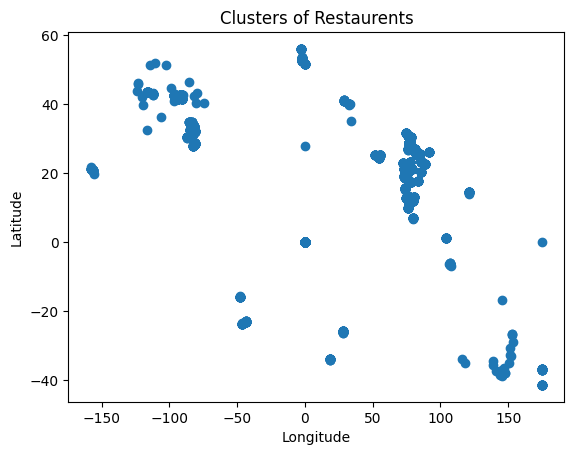

In [20]:
plt.scatter(df['Longitude'],df['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Restaurents')
plt.show()

# LEVEL_2 Task_4 (Restaurant Chains)

## 1.Identify if there are any restaurant chains present in the dataset. 

In [21]:
chain = df['Restaurant Name'].value_counts()
rest_chain = chain[chain>1]
rest_chain

Restaurant Name
Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Town Hall              2
Halki Aanch            2
Snack Junction         2
Delhi Biryani Hut      2
Beliram Degchiwala     2
Name: count, Length: 734, dtype: int64

## 2.Analyze the ratings and popularity of different restaurant chains.

In [22]:
chain_stat = df.groupby('Restaurant Name').agg({'Aggregate rating':'mean', 'Restaurant ID':'count'}).reset_index()
chain_stat.columns = ['Restaurant Name', 'Average Rating', 'Popularity']

In [23]:
# Analyze popularity of different restaurent with avg rating
chain_stat.sort_values('Average Rating', ascending=False, inplace=True)
chain_stat

,Restaurant Name,Average Rating,Popularity
5322,Restaurant Mosaic @ The Orient,4.9,1
4177,Ministry of Crab,4.9,1
4135,Miann,4.9,1
5757,Shorts Burger and Shine,4.9,1
4165,Milse,4.9,1
...,...,...,...
1105,Cafe Corner,0.0,1
4905,Pheva Tandooris,0.0,1
4913,Pick & Carry,0.0,1
1096,Cafe Brownie,0.0,1


In [24]:
chain_stat.sort_values('Popularity', ascending=True)
chain_stat

,Restaurant Name,Average Rating,Popularity
5322,Restaurant Mosaic @ The Orient,4.9,1
4177,Ministry of Crab,4.9,1
4135,Miann,4.9,1
5757,Shorts Burger and Shine,4.9,1
4165,Milse,4.9,1
...,...,...,...
1105,Cafe Corner,0.0,1
4905,Pheva Tandooris,0.0,1
4913,Pick & Carry,0.0,1
1096,Cafe Brownie,0.0,1


## Let's visualize it  

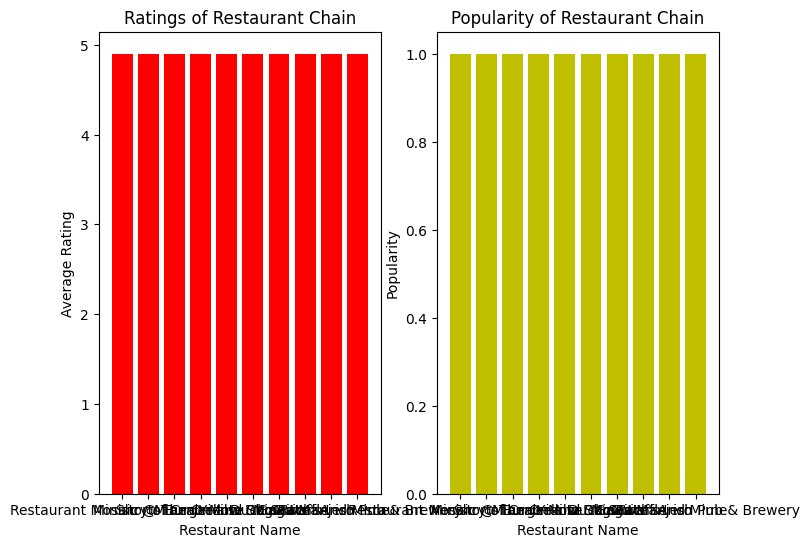

In [25]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.bar(chain_stat['Restaurant Name'][:10], chain_stat['Average Rating'][:10],color='red')
plt.xlabel('Restaurant Name')
plt.ylabel('Average Rating')
plt.title('Ratings of Restaurant Chain')
plt.subplot(1,2,2)
plt.bar(chain_stat['Restaurant Name'][:10],chain_stat['Popularity'][:10],color='y')
plt.xlabel('Restaurant Name')
plt.ylabel('Popularity')
plt.title('Popularity of Restaurant Chain')
plt.show()